### IMPORT STATEMENTS 
Below, you will see the import statements required to bring in our CSV data and generate graphical plots of the data later on.

In [2]:
import matplotlib.pyplot as plt
import csv

### SETTING UP OUR DATA
We start by bringing in CSV data into our Python program. We then parse the data using the CSV package. Lastly, we close the csv file after we have read the information.

In [3]:
with open('./data/ramen-ratings.csv', 'r', encoding="utf8") as datafile:
    ramen_ratings = csv.DictReader(datafile)
    data_list = []
    
    for row in ramen_ratings:
        data_list.append(row)

In [4]:
data_list[0]

{'Review #': '2580',
 'Brand': 'New Touch',
 'Variety': "T's Restaurant Tantanmen ",
 'Style': 'Cup',
 'Country': 'Japan',
 'Stars': '3.75',
 'Top Ten': ''}

### STAR RATING FREQUENCY
We will first begin by analying how often each rating is utilized within the dataset. We want to generate an array with six indices, for each rating value betweeen 0 and 5.

In [9]:
ratings = [0, 0, 0, 0, 0, 0] # Initialize ratings arr

for rating_value in data_list:
    try:
        if int(float(rating_value['Stars'])) == 0:
            ratings[0] += 1
        elif int(float(rating_value['Stars'])) == 1:
            ratings[1] += 1
        elif int(float(rating_value['Stars'])) == 2:
            ratings[2] += 1
        elif int(float(rating_value['Stars'])) == 3:
            ratings[3] += 1
        elif int(float(rating_value['Stars'])) == 4:
            ratings[4] += 1
        elif int(float(rating_value['Stars'])) == 5:
            ratings[5] += 1
    except:
        pass
    
print(ratings)

[54, 103, 250, 1043, 741, 386]


### RAMEN TOTALS BY COUNTRY
Next, we will collect data regarding total reviews and stars by country. This can be done by looping through all of the ratings, which have already been introduced to us.
This data will be used later on within a graphical plot.

In [10]:
country_count = {}  # empty set to append data

for rating_value in data_list:
    try:
        if not country_count.get(rating_value['Country']):
            if rating_value['Country'] == 'United States':
                country_count['USA'] = {
                    'count': 1,
                    'total_stars': float(rating_value['Stars'])
                }
            else:
                country_count[rating_value['Country']] = {
                    'count': 1,
                    'total_stars': float(rating_value['Stars'])
                }
        else:
            if rating_value['Country'] == 'United States':
                country_count['USA']['count'] += 1
                country_count['USA']['total_stars'] += float(rating_value['Stars'])
            else:
                country_count[rating_value['Country']]['count'] += 1
                country_count[rating_value['Country']]['total_stars'] += float(rating_value['Stars'])
    except:
        pass

country_count['Other'] = {
    'count': 0,
    'total_stars': 0
}

for key, country in country_count.items():
    if country['count'] < 100:
        country_count['Other']['count'] += country['count']
        country_count['Other']['total_stars'] += country['total_stars']
        country_count[key]['count'] = 0
        
country_count = {key:val for key, val in country_count.items() if val['count'] != 0}

print(country_count)


{'Japan': {'count': 352, 'total_stars': 1401.525}, 'Taiwan': {'count': 224, 'total_stars': 821.0500000000001}, 'USA': {'count': 273, 'total_stars': 936.625}, 'South Korea': {'count': 309, 'total_stars': 1163.6999999999998}, 'Singapore': {'count': 109, 'total_stars': 449.75}, 'Thailand': {'count': 191, 'total_stars': 646.5000000000001}, 'Hong Kong': {'count': 137, 'total_stars': 520.85}, 'Vietnam': {'count': 108, 'total_stars': 344.3}, 'Malaysia': {'count': 156, 'total_stars': 643.9}, 'Indonesia': {'count': 126, 'total_stars': 512.5}, 'China': {'count': 169, 'total_stars': 578.3}, 'Other': {'count': 375, 'total_stars': 1215.35}}


### RAMEN TOTALS BY BRAND
Next, we will collect data regarding total reviews and stars by brand (as opposed to country). This can be done by looping through all of the ratings once again. This should be rather familiar from the previous two steps.
This data will be used later on within a graphical plot.


In [12]:
brand_count = {}  # empty set to append data

for rating_value in data_list:
    try:
        if not brand_count.get(rating_value['Brand']):
            brand_count[rating_value['Brand']] = {
                'count': 1,
                'total_stars': float(rating_value['Stars'])
            }
        else:
                brand_count[rating_value['Brand']]['count'] += 1
                brand_count[rating_value['Brand']]['total_stars'] += float(rating_value['Stars'])
    except:
        pass

brand_count['Other'] = {
    'count': 0,
    'total_stars': 0
}

for key, brand in brand_count.items():
    if brand['count'] < 30:
        brand_count['Other']['count'] += brand['count']
        brand_count['Other']['total_stars'] += brand['total_stars']
        brand_count[key]['count'] = 0
        
brand_count = {key:val for key, val in brand_count.items() if val['count'] != 0}

print(brand_count)

{'Nissin': {'count': 381, 'total_stars': 1492.975}, 'Samyang Foods': {'count': 52, 'total_stars': 207.5}, 'Nongshim': {'count': 98, 'total_stars': 392.0}, 'Paldo': {'count': 66, 'total_stars': 265.25}, 'Ottogi': {'count': 45, 'total_stars': 152.75}, 'Maruchan': {'count': 76, 'total_stars': 270.125}, 'Maggi': {'count': 30, 'total_stars': 110.4}, 'Indomie': {'count': 53, 'total_stars': 215.75}, 'Myojo': {'count': 63, 'total_stars': 239.5}, 'Vifon': {'count': 33, 'total_stars': 100.8}, 'Mama': {'count': 71, 'total_stars': 257.65}, 'Vina Acecook': {'count': 34, 'total_stars': 120.25}, 'Lucky Me!': {'count': 34, 'total_stars': 112.0}, 'Other': {'count': 1543, 'total_stars': 5481.150000000001}}


### GENERATING PLOTS OF OUR DATA
Ah yes, the long-awaited, most exciting part of this project has arrived! We will generate meaningful and visually-appealing graphs and charts using the data we collected in all of the previous steps. 

#### GRAPH #1: Frequency of Star Ratings
The first graph we will display is a bar graph of the distribution of star ratings from the "Star Rating Frequency" section.

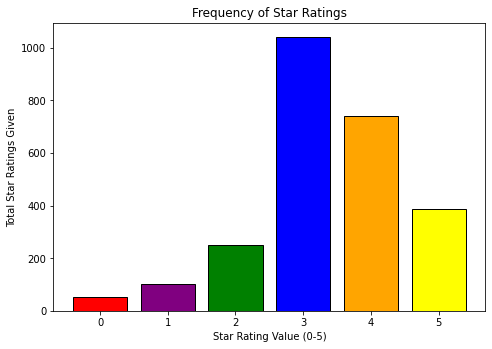

In [50]:
figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
stars = ['0', '1', '2', '3', '4', '5']
axes.bar(stars, ratings, color={"blue", "green", "red", "orange", "purple", "yellow"}, edgecolor="black")
axes.set_title('Frequency of Star Ratings')
axes.set_ylabel('Total Star Ratings Given')
axes.set_xlabel('Star Rating Value (0-5)')
plt.show()

#### GRAPH #2: Total Star Ratings by Country
Next we will display a pie chart showing total star ratings by country from the "Ramen Totals by Country" section.

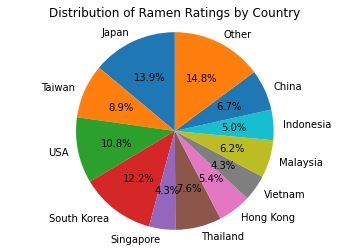

In [46]:
countries = []
count = []
avg_stars = []

for key, value in country_count.items():
    countries.append(key)
    count.append(value['count'])
    avg_stars.append(float(value['total_stars']) / float(value['count']))
    
figure1, axis1 = plt.subplots()
axis1.pie(count, labels=countries, autopct='%1.1f%%',
        shadow=False, startangle=90 )
axis1.axis('equal')  
axis1.set_title("Distribution of Ramen Ratings by Country")

plt.show()

#### GRAPH #3: Total Star Ratings by Brand
Next we will display a pie chart showing total star ratings by brand from the "Ramen Totals by Brand" section.

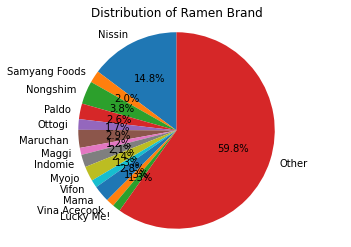

In [67]:
brands = []
count = []
avg_stars = []

for key, value in brand_count.items():
    brands.append(key)
    count.append(value['count'])
    avg_stars.append(float(value['total_stars']) / float(value['count']))
    
fig1, ax1 = plt.subplots()
ax1.pie(count, labels=brands, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  
ax1.set_title("Distribution of Ramen Brand")

plt.show() 

### CONCLUSION
Thank you for taking the time to look over my Data Visualization project using Python! 
